In [1]:
import pandas as pd
import os
os.listdir()

['.ipynb_checkpoints',
 'chat02',
 'venv',
 '국가별_수출입현황_20250721102513.csv',
 '무역수출입현황.ipynb',
 '어쩌면최종데이터.csv',
 '이우태_환율예측기.ipynb']

In [2]:
df = pd.read_csv('국가별_수출입현황_20250721102513.csv', encoding='cp949')
df.head()

,국가별(1),항목,2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.10,2024.11,2024.12,2025.01,2025.02,2025.03,2025.04,2025.05
0,중국,수출금액 (천불),10695827,9644037,10520355,10475410,11378217,10706131,11388071,11340799,11626573,12172811,11290362,11772793,9208869,9503748,10058345,10878158,10423215
1,중국,수입금액 (천불),12396980,9429123,11409748,12425106,12287459,10941026,11942846,11482791,11221400,12513916,11445747,12382340,11203444,9483429,11373753,12502368,11342436
2,중국,무역수지 (천불),-1701153,214914,-889393,-1949696,-909242,-234895,-554775,-141992,405173,-341105,-155385,-609547,-1994575,20320,-1315408,-1624210,-919221
3,미국,수출금액 (천불),10252308,9809053,10880793,11400587,10930529,11295693,10184399,9937504,10411877,10394328,10370481,11893820,9282884,9891774,11116711,10603220,10046557
4,미국,수입금액 (천불),6138062,5612523,5975811,6012893,6375264,5496912,7921852,6257983,5457525,5968731,5438200,5476550,5831624,5734014,5387979,6145399,6767900


In [3]:
df_melted = df.melt(id_vars=['국가별(1)', '항목'], var_name='기준년월', value_name='값')
df_melted

,국가별(1),항목,기준년월,값
0,중국,수출금액 (천불),2024.01,10695827
1,중국,수입금액 (천불),2024.01,12396980
2,중국,무역수지 (천불),2024.01,-1701153
3,미국,수출금액 (천불),2024.01,10252308
4,미국,수입금액 (천불),2024.01,6138062
...,...,...,...,...
13306,해외교포,수입금액 (천불),2025.05,2
13307,해외교포,무역수지 (천불),2025.05,-2
13308,자이르,수출금액 (천불),2025.05,0
13309,자이르,수입금액 (천불),2025.05,0


In [4]:
# 항목을 컬럼으로 pivot
df_pivot = df_melted.pivot(index=['국가별(1)', '기준년월'], columns='항목', values='값').reset_index()
df_pivot

항목,국가별(1),기준년월,무역수지 (천불),수입금액 (천불),수출금액 (천불)
0,가나,2024.01,14548,864,15413
1,가나,2024.02,15754,1691,17445
2,가나,2024.03,9457,2894,12351
3,가나,2024.04,12846,3459,16306
4,가나,2024.05,8154,5249,13404
...,...,...,...,...,...
4432,홍콩,2025.01,1502089,183371,1685461
4433,홍콩,2025.02,1439802,451354,1891156
4434,홍콩,2025.03,2350571,328493,2679064
4435,홍콩,2025.04,2316635,201408,2518043


In [5]:
df_pivot.columns = ['국가','기준년월','무역수지','수입금액','수출금액']
df_pivot.head()

,국가,기준년월,무역수지,수입금액,수출금액
0,가나,2024.01,14548,864,15413
1,가나,2024.02,15754,1691,17445
2,가나,2024.03,9457,2894,12351
3,가나,2024.04,12846,3459,16306
4,가나,2024.05,8154,5249,13404


In [6]:
df_pivot['기준년월'] = pd.to_datetime(df_pivot['기준년월'], format='%Y.%m')

In [7]:
df_pivot= df_pivot.set_index('기준년월')

In [9]:
df_pivot['거래규모'] = df_pivot['수입금액'] + df_pivot['수출금액']

In [11]:
print('[거래규모]')
df_pivot.groupby('국가').sum().sort_values('거래규모', ascending=False)[:10]

[거래규모]


,무역수지,수입금액,수출금액,거래규모
국가,,,,
중국,-12700190,195783912,183083721,378867633
미국,76703300,101999222,178702518,280701740
베트남,41790543,40732776,82523320,123256096
일본,-26907487,67983381,41075895,109059276
대만,7537886,42512598,50050482,92563080
호주,-22081366,42930829,20849459,63780288
홍콩,43107176,3542273,46649453,50191726
사우디아라비아,-35850568,42847445,6996878,49844323
독일,-17432771,30856433,13423660,44280093


In [18]:
print('[수입상위]')
df_pivot.groupby('국가').sum().sort_values('수입금액', ascending=False)

[수입상위]


,무역수지,수입금액,수출금액
국가,,,
중국,-12700190,195783912,183083721
미국,76703300,101999222,178702518
일본,-26907487,67983381,41075895
호주,-22081366,42930829,20849459
사우디아라비아,-35850568,42847445,6996878
...,...,...,...
미드웨이 군도,0,0,0
유고,0,0,0
파나마운하지역,0,0,0


In [17]:
print('[수출상위]')
df_pivot.groupby('국가').sum().sort_values('수출금액', ascending=False)

[수출상위]


,무역수지,수입금액,수출금액
국가,,,
중국,-12700190,195783912,183083721
미국,76703300,101999222,178702518
베트남,41790543,40732776,82523320
대만,7537886,42512598,50050482
홍콩,43107176,3542273,46649453
...,...,...,...
스발비드 군도,0,0,0
세인트 피레 미켈론,0,0,0
니우에,-263,263,0


In [16]:
print('[무역수지]')
df_pivot.groupby('국가').sum().sort_values('무역수지', ascending=False)

[무역수지]


,무역수지,수입금액,수출금액
국가,,,
미국,76703300,101999222,178702518
홍콩,43107176,3542273,46649453
베트남,41790543,40732776,82523320
인도,17348233,9230751,26578986
폴란드,11450004,1440687,12890693
...,...,...,...
카타르,-17389343,19195918,1806577
독일,-17432771,30856433,13423660
호주,-22081366,42930829,20849459


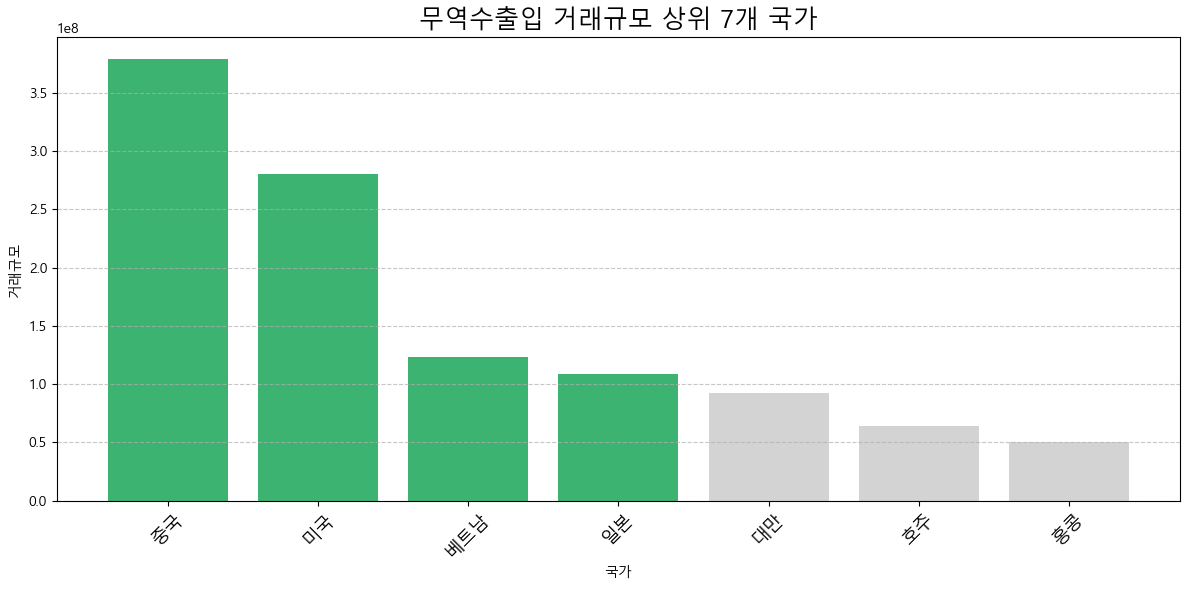

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

top10 = df_pivot.groupby('국가').sum().sort_values('거래규모', ascending=False).head(7)

# 색상 지정
colors = ['mediumseagreen' if i < 4 else 'lightgray' for i in range(len(top10))]

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(top10.index, top10['거래규모'], color=colors)
plt.title('무역수출입 거래규모 상위 7개 국가',fontsize=18)
plt.xlabel('국가')
plt.ylabel('거래규모')
plt.xticks(rotation=45, fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()